In [1]:


import h5py
import numpy as np
import pandas as pd

# Path to the HDF5 file
h5_file_path = "/Users/mandarmp/Documents/Projects/MEA_Analysis/NetworkAnalysis/Compiled_Distributions_New.h5"  # Replace with the actual path to your HDF5 file


# Reading the h5

In [2]:
import h5py

def print_h5_detailed(name, obj):
    """Print detailed structure and content of the HDF5 file."""
    indent = "  " * (name.count('/') - 1)
    if isinstance(obj, h5py.Group):
        print(f"{indent}Group: {name}")
        # Print group attributes
        for attr in obj.attrs:
            print(f"{indent}  [Attr] {attr}: {obj.attrs[attr]}")
    elif isinstance(obj, h5py.Dataset):
        print(f"{indent}Dataset: {name}, Shape: {obj.shape}, Dtype: {obj.dtype}")
        # Print dataset attributes
        for attr in obj.attrs:
            print(f"{indent}  [Attr] {attr}: {obj.attrs[attr]}")
        # Print first few values (if not too large)
        try:
            data = obj[()]
            print(f"{indent}  Data type: {data.dtype}, Shape: {data.shape}")
            if data.size < 20:
                print(f"{indent}  Values: {data}")
            else:
                print(f"{indent}  First 5 values: {data.flat[:5]}")
        except Exception as e:
            print(f"{indent}  Could not read data: {e}")

with h5py.File(h5_file_path, 'r') as h5file:
    h5file.visititems(print_h5_detailed)

Dataset: Amplitude_uV, Shape: (26400, 194), Dtype: float64
  Data type: float64, Shape: (26400, 194)
  First 5 values: [0. 0. 0. 0. 0.]
Dataset: AssayType, Shape: (18, 194), Dtype: float64
  Data type: float64, Shape: (18, 194)
  First 5 values: [83. 83. 83. 83. 83.]
Dataset: Chip_ID, Shape: (1, 194), Dtype: float64
  Data type: float64, Shape: (1, 194)
  First 5 values: [nan nan nan nan nan]
Dataset: DIV, Shape: (1, 194), Dtype: float64
  Data type: float64, Shape: (1, 194)
  First 5 values: [5. 5. 5. 5. 5.]
Dataset: FR_Hz, Shape: (26400, 194), Dtype: float64
  Data type: float64, Shape: (26400, 194)
  First 5 values: [0. 0. 0. 0. 0.]
Dataset: Fano, Shape: (26400, 194), Dtype: float64
  Data type: float64, Shape: (26400, 194)
  First 5 values: [nan nan nan nan nan]
Dataset: ISI_CV, Shape: (26400, 194), Dtype: float64
  Data type: float64, Shape: (26400, 194)
  First 5 values: [nan nan nan nan nan]
Dataset: ISI_STD, Shape: (26400, 194), Dtype: float64
  Data type: float64, Shape: (2640

In [3]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with h5py.File(h5_file_path, 'r') as h5file:
    firing_rate = h5file['FR_Hz'][:]        # (26400, 234)
    amplitude = h5file['Amplitude_uV'][:]    # (26400, 234)
    divs = h5file['DIV'][:].flatten()     
    runs = h5file['Run_ID'][:].flatten()     # (234,)
    neurontypes = h5file['NeuronType'][:].flatten()  # (234,)
    chip_ids = h5file['Chip_ID'][:].flatten()  # (234,)
    wells = h5file['Well'][:].flatten()          # (234,)
    isis = h5file['ISI_s'][:]  # (26400, 234)

# Build a long-form DataFrame
records = []
for col in range(firing_rate.shape[1]):
    # For each session (column), associate all amplitude values with its metadata
    session_df = pd.DataFrame({
        'Firing_rate': firing_rate[:, col],
        'Amplitude_uV': amplitude[:, col],
        'ISIs' : isis[:, col],
        'DIV': divs[col],
        'Run_ID': runs[col],
        'NeuronType': neurontypes[col],
        'ID': chip_ids[col],
        'Well': wells[col]
    })
    records.append(session_df)
df = pd.concat(records, ignore_index=True)

# Clean up if needed
#df = df.dropna(subset=['Amplitude_uV', 'DIV', 'NeuronType'])
df['NeuronType'] = df['NeuronType'].astype(str)
df['ID'] = df['ID'].astype(str)
df['DIV'] = df['DIV'].astype(int)



In [4]:
display(df.head())
print(df['DIV'].unique())
print(df['NeuronType'].unique())

,Firing_rate,Amplitude_uV,ISIs,DIV,Run_ID,NeuronType,ID,Well
0,0.0,0.000000,NaN,5,5.0,nan,nan,1.0
1,0.1,51.899258,8.0,5,5.0,nan,nan,1.0
2,0.0,0.000000,NaN,5,5.0,nan,nan,1.0
3,0.0,0.000000,NaN,5,5.0,nan,nan,1.0
4,0.0,0.000000,NaN,5,5.0,nan,nan,1.0


[ 5  8 13 16 20 23 27 30]
['nan']


Neuron type has issue need to correct my matlab program.

In [5]:
import pandas as pd

# Example: Load your Excel file
reffile_df = pd.read_excel("/Users/mandarmp/Documents/CDKL5Paper/Fig2/CDKL5_T1_C1_reff.xlsx")

# Split the comma-separated columns into lists
reffile_df['Wells_Recorded'] = reffile_df['Wells_Recorded'].astype(str).str.split(',')
reffile_df['Neuron Source'] = reffile_df['Neuron Source'].astype(str).str.split(',')

# Remove extra spaces
reffile_df['Wells_Recorded'] = reffile_df['Wells_Recorded'].apply(lambda x: [w.strip() for w in x])
reffile_df['Neuron Source'] = reffile_df['Neuron Source'].apply(lambda x: [n.strip() for n in x])

# Explode both columns to get one row per well/neuron type
reffile_expanded = reffile_df.explode(['Wells_Recorded', 'Neuron Source'], ignore_index=True)

# Now each row is a single well with its neuron type
print(reffile_expanded.head())

        Date  DIV          Assay  Run #      ID Wells_Recorded Neuron Source
0 2024-05-20    5       Sparse7x      1  M07420              1          MxWT
1 2024-05-20    5  Network Today      2  M07420              1          MxWT
2 2024-05-20    5       Sparse7x      3  M07427              1          MxWT
3 2024-05-20    5       Sparse7x      3  M07427              2          MxWT
4 2024-05-20    5       Sparse7x      3  M07427              3          MxWT


In [6]:
df.columns = ['firing_rate','amplitude','isis', 'DIV', 'Run #', 'Neuron Source', 'ID','Wells_Recorded']

display(df.head())

,firing_rate,amplitude,isis,DIV,Run #,Neuron Source,ID,Wells_Recorded
0,0.0,0.000000,NaN,5,5.0,nan,nan,1.0
1,0.1,51.899258,8.0,5,5.0,nan,nan,1.0
2,0.0,0.000000,NaN,5,5.0,nan,nan,1.0
3,0.0,0.000000,NaN,5,5.0,nan,nan,1.0
4,0.0,0.000000,NaN,5,5.0,nan,nan,1.0


In [7]:
df['Run #'] = df['Run #'].astype(int)
df['Wells_Recorded'] = df['Wells_Recorded'].astype(int)
reffile_expanded['Run #'] = reffile_expanded['Run #'].astype(int)
reffile_expanded['Wells_Recorded'] = reffile_expanded['Wells_Recorded'].astype(int)

df = df.merge(
    reffile_expanded[['Run #', 'Wells_Recorded', 'Neuron Source','ID']],
    on=['Run #', 'Wells_Recorded'],
    how='left'
)

In [8]:

df = df.drop(columns=['Neuron Source_x', 'ID_x'])
df = df.rename(columns={'Neuron Source_y': 'Neuron Source'})
df = df.rename(columns={'ID_y': 'ID'})
display(df.head())

,firing_rate,amplitude,isis,DIV,Run #,Wells_Recorded,Neuron Source,ID
0,0.0,0.000000,NaN,5,5,1,MxHEMI,M07039
1,0.1,51.899258,8.0,5,5,1,MxHEMI,M07039
2,0.0,0.000000,NaN,5,5,1,MxHEMI,M07039
3,0.0,0.000000,NaN,5,5,1,MxHEMI,M07039
4,0.0,0.000000,NaN,5,5,1,MxHEMI,M07039


In [9]:
df['Neuron Source'].unique()

array(['MxHEMI', 'MxWT', 'FxHET'], dtype=object)

In [10]:
palette = {'MxWT': '#1f77b4', 'FxHET': '#ff7f0e', 'MxHEMI': '#d62728'}
order = ['MxWT', 'FxHET', 'MxHEMI']

In [ ]:
# Create a unique identifier for each ID and Well combination
df['ID_Well'] = df['ID'].astype(str) + '_W' + df['Wells_Recorded'].astype(str)

# List all unique ID_Well configurations
unique_id_well = df['ID_Well'].unique()
print(unique_id_well)

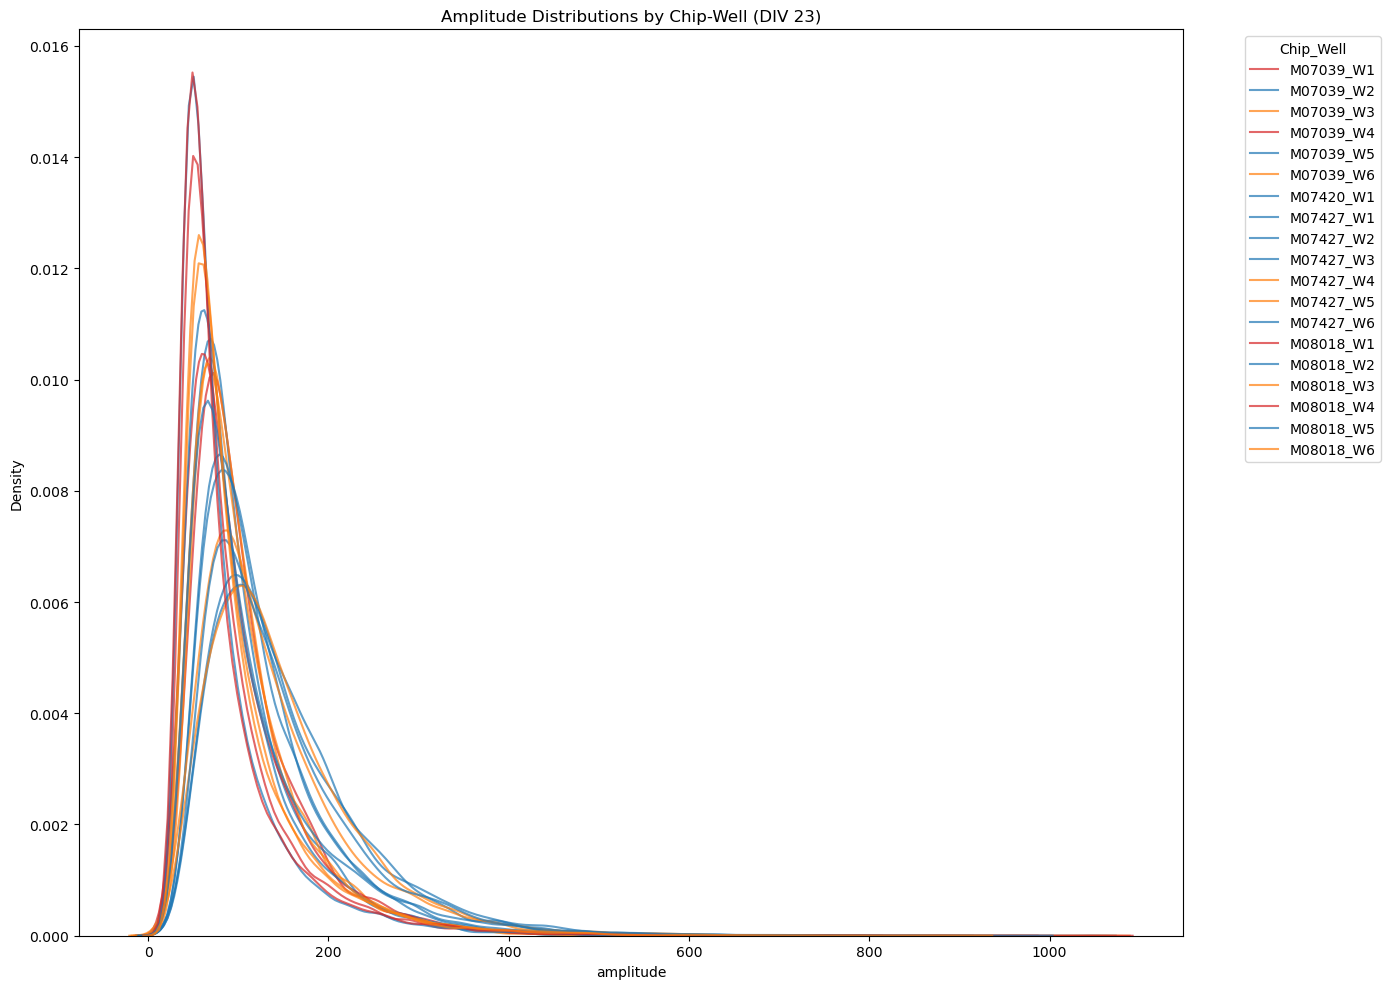

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fixed filtering
selected_div = 23
selected_measure = 'amplitude'
threshold = 20

df_filtered = df[df['DIV'] == selected_div]
df_filtered = df_filtered[df_filtered[selected_measure] > threshold]



# Create a combined identifier
df_filtered['Chip_Well'] = df_filtered['ID'].astype(str) + '_W' + df_filtered['Wells_Recorded'].astype(str)
plt.figure(figsize=(14, 10))
for chip_well, group in df_filtered.groupby('Chip_Well'):
    neuron_source = group['Neuron Source'].iloc[0]
    color = palette.get(neuron_source, None)
    if len(group) > 1:  # KDE needs at least 2 points
        sns.kdeplot(
            data=group,
            x=selected_measure,
            label=chip_well,
            color=color,
            alpha=0.7,
            linewidth=1.5
        )
plt.title(f'Amplitude Distributions by Chip-Well (DIV {selected_div})')
plt.xlabel(selected_measure)
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Chip_Well')
plt.tight_layout()
plt.show()

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_6904/4218596525.py:53: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


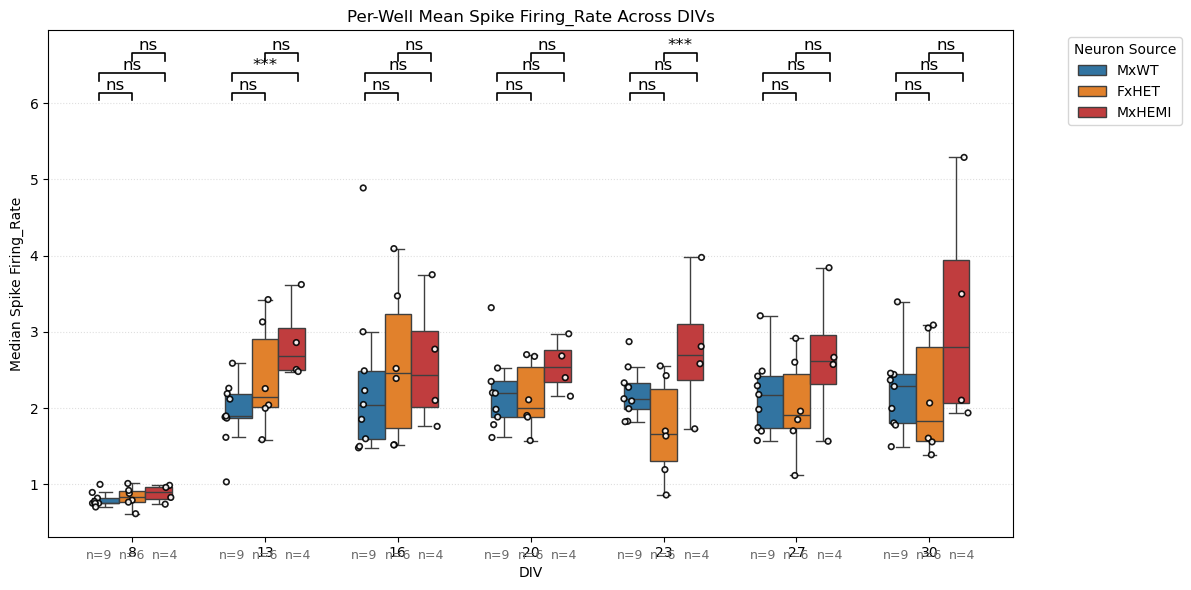

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests
from IPython.display import display

# ---- Parameters ----
selected_measure = 'firing_rate'  # 'amplitude' or 'firing_rate'
if selected_measure == 'amplitude':
    threshold = 20
else:
    threshold = 0.1
divs_to_plot = [8, 13,16, 20, 23,27,30]

palette = {'MxWT': '#1f77b4', 'FxHET': '#ff7f0e', 'MxHEMI': '#d62728'}
order = ['MxWT', 'FxHET', 'MxHEMI']

# ---- Filter and aggregate data for all DIVs ----
df_filtered = df[df['DIV'].isin(divs_to_plot)].copy()
df_filtered = df_filtered[df_filtered[selected_measure] > threshold]
df_filtered['Chip_Well'] = df_filtered['ID'].astype(str) + '_W' + df_filtered['Wells_Recorded'].astype(str)

df_well = (
    df_filtered
    .groupby(['DIV', 'Chip_Well'])
    .agg({selected_measure: 'mean', 'Neuron Source': 'first'})
    .reset_index()
    .rename(columns={selected_measure: 'mean_value'})
)

# ---- Stats and plotting ----
summary_rows = []
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=df_well,
    x='DIV',
    y='mean_value',
    hue='Neuron Source',
    order=divs_to_plot,
    hue_order=order,
    palette=palette,
    width=0.6,
    showfliers=False,
    ax=ax
)

sns.stripplot(
    data=df_well,
    x='DIV',
    y='mean_value',
    hue='Neuron Source',
    dodge=True,
    order=divs_to_plot,
    hue_order=order,
    palette=['white'],
    size=4,
    jitter=0.1,
    alpha=0.9,
    edgecolor='black',
    linewidth=1.2,
    ax=ax
)

# Fix legend to show only once
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(order)], labels[:len(order)], title='Neuron Source', bbox_to_anchor=(1.05,1), loc='upper left')

ymin, ymax = ax.get_ylim()
yrange = ymax - ymin

for i, div in enumerate(divs_to_plot):
    sub = df_well[df_well['DIV'] == div].copy()
    counts = sub.groupby('Neuron Source')['mean_value'].size()
    valid_groups = [nt for nt in order if counts.get(nt, 0) >= 2]
    sub = sub[sub['Neuron Source'].isin(valid_groups)]
    
    # One-way ANOVA
    p_anova = np.nan
    if sub['Neuron Source'].nunique() >= 2:
        try:
            model = ols('mean_value ~ C(`Neuron Source`)', data=sub).fit()
            anova_results = anova_lm(model, typ=2)
            p_anova = anova_results.loc['C(`Neuron Source`)', 'PR(>F)']
        except Exception:
            p_anova = np.nan
    if not np.isnan(p_anova):
        sig = "***" if p_anova < 0.001 else "**" if p_anova < 0.01 else "*" if p_anova < 0.05 else "ns"
        ax.text(i, ymax + yrange*0.05, f'ANOVA p={p_anova:.3g} ({sig})', ha='center', fontsize=10)
    
    # Tukey HSD pairs
    try:
        if sub['Neuron Source'].nunique() >= 2:
            tuk = pairwise_tukeyhsd(sub['mean_value'], sub['Neuron Source'], alpha=0.05)
            tuk_results = pd.DataFrame(data=tuk._results_table.data[1:], columns=tuk._results_table.data[0])
            
            pairs = list(combinations(order, 2))
            h = yrange * 0.02
            base = yrange * 0.10
            step = 0.05
            for k, (s1, s2) in enumerate(pairs):
                row = tuk_results[
                    ((tuk_results['group1'] == s1) & (tuk_results['group2'] == s2)) |
                    ((tuk_results['group1'] == s2) & (tuk_results['group2'] == s1))
                ]
                if row.empty:
                    continue
                p_adj = float(row['reject'].values[0])
                sig = "***" if p_adj else "ns"
                
                # positions
                step_x = 0.25
                x1 = i + (order.index(s1) - 1) * step_x
                x2 = i + (order.index(s2) - 1) * step_x
                y = ymax + base + k * (yrange * step)
                
                ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                ax.text((x1+x2)/2, y+h, sig, ha='center', va='bottom', fontsize=12)
    except Exception:
        pass
    
    # Sample size annotation
    counts_n = sub.groupby('Neuron Source')['Chip_Well'].nunique()
    for j, nt in enumerate(order):
        n = counts_n.get(nt, 0)
        x_pos = i + (j - 1) * 0.25
        ax.text(x_pos, ymin - yrange*0.07, f'n={n}', ha='center', fontsize=9, color='dimgrey')

# Cosmetics
ax.yaxis.grid(True, linestyle=':', alpha=0.4)
ax.set_axisbelow(True)
ax.set_ylabel(f'Median Spike {selected_measure.title()}')
ax.set_xlabel('DIV')
ax.set_title(f'Per-Well Mean Spike {selected_measure.title()} Across DIVs')

plt.tight_layout()
plt.savefig(f"/Users/mandarmp/Documents/CDKL5Paper/Fig2/boxplot_{selected_measure}_DIVs_anova_tukey.svg", format='svg')
plt.show()


/Users/mandarmp/anaconda3/envs/map/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


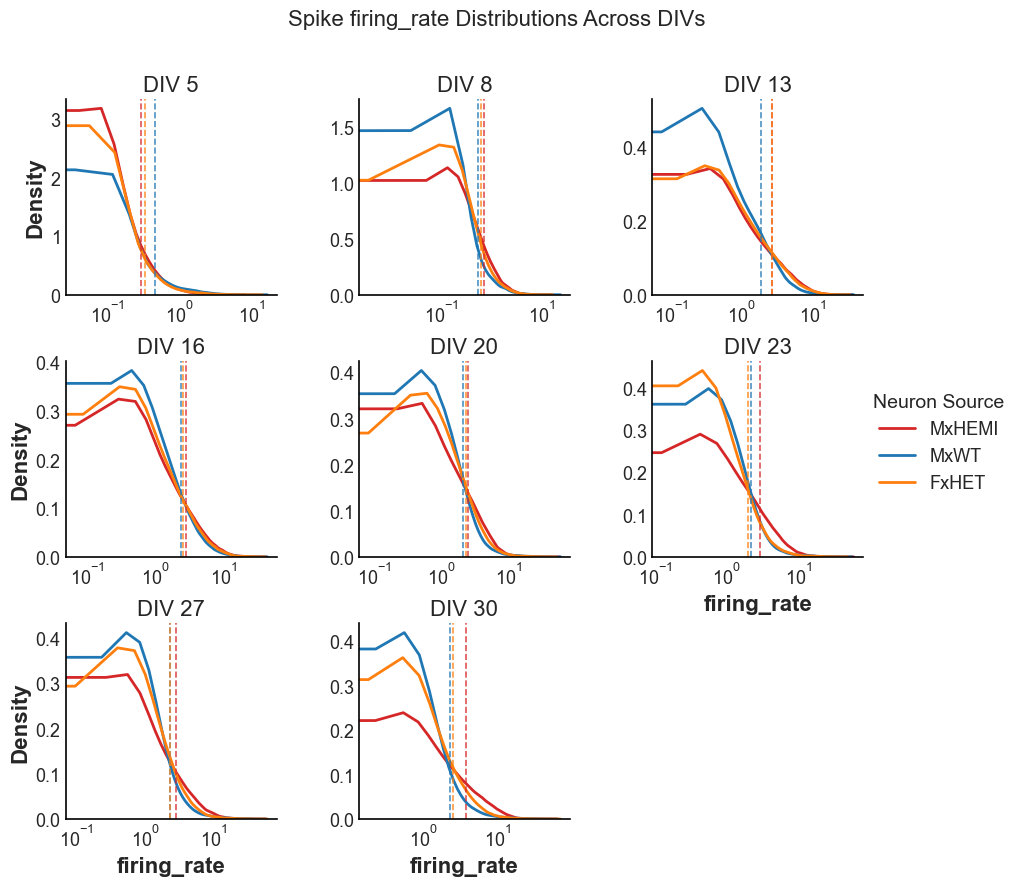

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---------------------------------------
# 1. Data preparation
# ---------------------------------------

metric = 'firing_rate'  # Change to 'firing_rate' or 'amplitude' as needed

palette = {'MxWT': '#1f77b4', 'FxHET': '#ff7f0e', 'MxHEMI': '#d62728'}

order = ['MxWT', 'FxHET', 'MxHEMI']


# Convert amplitude to numeric if it's not already
df[metric] = pd.to_numeric(df[metric], errors='coerce')

threshold = 20 if metric == 'amplitude' else 0.01


# Drop NaNs and optionally apply a minimum threshold
df = df[np.isfinite(df[metric]) & (df[metric] > threshold)]


sns.set_theme(style='white', font_scale=1.3, rc={
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.labelweight": "bold",
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.title_fontsize": 14,
    "xtick.direction": "in",
    "ytick.direction": "in"
})


# ---------------------------------------
# 2. Create the facet grid
# ---------------------------------------
# Facet by DIV, color by Neuron Source
g = sns.FacetGrid(
    df, 
    col="DIV", 
    hue="Neuron Source", 
    col_wrap=3,            # Arrange 3 plots per row
    sharex=False, 
    sharey=False,          # Let each subplot have its own y-scale
    palette=palette
)

# Map KDE plot onto each subplot
g.map_dataframe(
    sns.kdeplot, 
    x=metric, 
    fill=False,             # Filled density curves
    common_norm=False,     # Don't normalize across groups
    alpha=1,
    linewidth=2
)


# Optionally add vertical lines for median
for ax, div in zip(g.axes.flat, sorted(df['DIV'].unique())):
    for source in df['Neuron Source'].unique():
        subset = df[(df['DIV'] == div) & (df['Neuron Source'] == source)]
        mean = subset[metric].mean()
        ax.axvline(mean, color=palette[source], linestyle='--', alpha=0.8, linewidth=1.2)
        ax.set_xscale('log')
# ---------------------------------------
# 3. Axis labels and legend
# ---------------------------------------
g.set_axis_labels(metric, "Density")
g.add_legend(title='Neuron Source')
g.fig.suptitle(f"Spike {metric} Distributions Across DIVs", fontsize=16)
g.set_titles(col_template="DIV {col_name}")

# Fix layout so titles don't overlap
#plt.tight_layout()
plt.subplots_adjust(top=0.88)

# ---------------------------------------
# 4. Show the plot
# ---------------------------------------
plt.savefig(f"/Users/mandarmp/Documents/CDKL5Paper/Fig2/kde_{metric}_DIVs.svg", format="svg", dpi=300)
plt.show()